In [13]:
import numpy as np
import pandas as pd
df = pd.read_csv('wasabi_artists.csv')

df_plot = df[["genres", "dbp_genre","lifeSpan.begin","lifeSpan.end", "locationInfo", "location.country"]]
df_plot.head()

for ind in df_plot.index:
    row = df_plot['locationInfo'][ind]
    n_row = row.split('"')
    if len(n_row) > 1:
        df_plot['locationInfo'][ind] = n_row[1]
    else:
        df_plot['locationInfo'][ind] = np.nan
        
for ind in df_plot.index:
    row = df_plot['genres'][ind]
    n_row = row.split('"')
    if len(n_row) > 1:
        df_plot['genres'][ind] = n_row[1]
    else:
        df_plot['genres'][ind] = np.nan
        
for ind in df_plot.index:
    
    row = df_plot['dbp_genre'][ind]
    if pd.isnull(row):
        continue
    else:
        n_row = row.split('"')
        if len(n_row) > 1:
            df_plot['dbp_genre'][ind] = n_row[1]
        else:
            df_plot['dbp_genre'][ind] = np.nan

for ind in df_plot.index:
    row = df_plot['lifeSpan.begin'][ind]
    if pd.isnull(row):
        continue
    else:
        n_row = row.split('-')
        df_plot['lifeSpan.begin'][ind] = n_row[0]

df_plot = df_plot.drop(columns = ["lifeSpan.end"])
df_plot = df_plot.dropna(subset=['lifeSpan.begin'])

for ind in df_plot.index:
    row = df_plot['locationInfo'][ind]
    row1 = df_plot['dbp_genre'][ind]
    if pd.isnull(row):
        df_plot['locationInfo'][ind] = df_plot['location.country'][ind]
    if pd.isnull(row1):
        df_plot['dbp_genre'][ind] = df_plot['genres'][ind]
        
df_plot = df_plot.drop(columns = ["location.country", "genres"])
df_plot.head(20)

C:\Users\frafa\anaconda3\envs\data_visual_p\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3,41) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\frafa\anaconda3\envs\data_visual_p\lib\site-packages\IPython\core\interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,dbp_genre,lifeSpan.begin,locationInfo
0,Alternative rock,1995,England
1,J-Rock,2010,Japan
4,Heavy metal music,2001,United States
7,NaN,2001,United States
10,NaN,2006,United States
11,NaN,2004,Belgium
18,Alternative rock,2001,Sweden
20,Neofolk,2000,The Netherlands
21,Post-hardcore,2001,United States
27,NaN,2006,NaN


In [19]:
df_plot.shape

(36062, 3)

In [20]:
df_base = df_plot

In [36]:
df_plot = df_base

In [37]:
df_plot=df_plot.fillna(0)

In [38]:
df_plot.head(10)

,dbp_genre,lifeSpan.begin,locationInfo
0,Alternative rock,1995,England
1,J-Rock,2010,Japan
4,Heavy metal music,2001,United States
7,0,2001,United States
10,0,2006,United States
11,0,2004,Belgium
18,Alternative rock,2001,Sweden
20,Neofolk,2000,The Netherlands
21,Post-hardcore,2001,United States
27,0,2006,0


In [39]:
df_plot = df_plot.rename(columns={'lifeSpan.begin': 'date'})
df_plot = df_plot.rename(columns={'locationInfo': 'country'})

In [40]:
import random
genres_list_1 = ['Rock', 'Pop', 'Country', 'HipHop', 'Folk',  'RnB', 'Metal', 'Blues', 'Electronic', 'Chanson', 'Other']
genres_list_2 = ['Rock', 'Pop', 'Country', 'HipHop', 'Folk']
#replacing titles
for ind in df_plot.index:
    row = df_plot['dbp_genre'][ind]
    if row == 0:
        df_plot['dbp_genre'][ind] = random.choice(genres_list_1)
    elif 'rock' in row or 'Rock' in row or 'punk' in row or 'Punk' in row or 'Funk' in row or 'Gospel' in row or 'Emo' in row or 'Post-grunge' in row:
        df_plot['dbp_genre'][ind] = 'Rock'
    elif 'pop' in row or 'Pop' in row:
        df_plot['dbp_genre'][ind] = 'Pop'
    elif 'country' in row or 'Country' in row or 'singer' in row or 'Singer' in row or 'New wave' in row or 'New Wave' in row or 'Independent music' in row or 'Experimental music' in row or 'R\\u0026B' in row or 'Schlager' in row or 'Acoustic music' in row or 'Americana (music)' in row or 'Film score' in row or 'Bluegrass music' in row :
        df_plot['dbp_genre'][ind] = 'Country'
    elif 'hiphop' in row or 'hip hop' in row or 'Hip hop' in row or 'Hip Hop' in row or 'Ska' in row or 'Trip hop' in row or 'Comedy' in row or 'Deathcore' in row:
        df_plot['dbp_genre'][ind] = 'HipHop'
    elif 'folk' in row or 'Folk' in row or 'reggae' in row or 'Reggae' in row or 'Shoegazing' in row or 'Gangsta rap' in row or 'jazz' in row or 'Jazz' in row:
        df_plot['dbp_genre'][ind] = 'Folk'
    elif 'rhythm' in row or 'Rhythm' in row or 'Dark wave' in row or 'Classical music' in row or 'Mathcore' in row or 'Big band' in row :
        df_plot['dbp_genre'][ind] = 'RnB'
    elif 'metal' in row or 'Metal' in row or 'Hardcore' in row:
        df_plot['dbp_genre'][ind] = 'Metal'
    elif 'blues' in row or 'Blues' in row or 'soul' in row or 'Soul' in row:
        df_plot['dbp_genre'][ind] = 'Blues'
    elif 'contemporary' in row or 'Contemporary' in row or 'chanson' in row or 'Chanson' in row or 'singer' in row or 'Singer' in row:
        df_plot['dbp_genre'][ind] = 'Chanson'
    elif 'electro' in row or 'Electro' in row or 'dance' in row or 'Dance' in row or 'Disco' in row or 'Brazilian' in row or 'Techno' in row or 'Industrial music' in row:
        df_plot['dbp_genre'][ind] = 'Electronic'
    else:
        df_plot['dbp_genre'][ind] = random.choice(genres_list_2)

In [41]:
df_plot.dbp_genre.unique().shape

(11,)

In [42]:
counts_genre = df_plot['dbp_genre'].value_counts().to_dict()
print(counts_genre)

{'Rock': 8269, 'Pop': 4166, 'Country': 3804, 'Metal': 3579, 'Folk': 3279, 'HipHop': 3248, 'Electronic': 2415, 'Blues': 2308, 'RnB': 1758, 'Chanson': 1753, 'Other': 1483}


In [43]:
genres_date_1 = range(2000, 2016)
for ind in df_plot.index:
    row = df_plot['date'][ind]
    if row == '????' or row == 0 :
        df_plot['date'][ind] = random.choice(genres_date_1)

In [44]:
country_list_1 = ['United States', 'England', 'Germany', 'Canada', 'France', 'Sweden', 'Italy', 'United Kingdom', 'Australia', 'Finland']
country_list_2 = ['England', 'Germany', 'Canada', 'France', 'Sweden', 'Italy', 'United Kingdom', 'Australia', 'Finland', 'Other']
for ind in df_plot.index:
    row = df_plot['country'][ind]
    if row in country_list_1:
        df_plot['country'][ind] = row
    else:
        df_plot['country'][ind] = random.choice(country_list_2)

In [49]:
counts_genre = df_plot['date'].value_counts().to_dict()
print(counts_genre)

{2003: 867, 1996: 838, 2004: 834, 1998: 834, 2001: 828, 1997: 818, 1999: 818, 1995: 805, 2005: 803, 2002: 802, 2000: 784, 1994: 773, 1993: 710, 1992: 669, 1989: 657, 2006: 655, 1979: 606, 1991: 603, 1981: 600, 1980: 585, 1986: 576, 1990: 568, 1978: 563, 1987: 552, 1982: 549, 1977: 543, 1985: 539, 1988: 536, 2007: 526, 1983: 518, 1976: 507, 1984: 494, 1970: 467, 1975: 464, 1969: 459, 1972: 451, 1973: 428, 1974: 423, 1968: 417, 2008: 414, 1971: 389, 1967: 386, 1966: 347, 1964: 335, 2009: 328, 1962: 311, 1965: 311, 1947: 278, 1963: 273, 2010: 262, 1948: 247, 1956: 245, 1946: 241, 1961: 241, 1960: 241, 1959: 240, 1958: 237, 1952: 235, 1949: 233, 1953: 229, 1945: 226, 1955: 224, 2011: 222, 1951: 220, 1944: 219, 1950: 216, 1957: 211, 1943: 201, 1954: 197, 1942: 188, 1941: 178, 1940: 174, 1939: 154, 2012: 132, 1938: 127, 1937: 119, 1936: 107, 1934: 101, 1935: 96, 1932: 96, 1928: 93, 1929: 91, 1925: 87, 2013: 86, 1933: 84, 1930: 79, 1927: 78, 1931: 75, 1926: 75, 1924: 74, 1922: 60, 1923: 58, 1

In [46]:
for ind in df_plot.index:
    row = df_plot['date'][ind]
    df_plot['date'][ind] = int(row)

In [47]:
df_plot.head(10)

,dbp_genre,date,country
0,Rock,1995,England
1,Rock,2010,Italy
4,Metal,2001,United States
7,Chanson,2001,United States
10,Rock,2006,United States
11,Electronic,2004,United Kingdom
18,Rock,2001,Sweden
20,Folk,2000,United Kingdom
21,Country,2001,United States
27,RnB,2006,Canada


In [48]:
df_plot = df_plot[df_plot['date'].astype(str).astype(int) >= 1880]

In [113]:
df_plot.groupby('date')['genre'].value_counts()

date  genre     
2000  Pop           2
      Folk          1
      Rock          1
2001  Hip Hop       1
      Pop           1
                   ..
2015  Country       2
      Electronic    2
      Hip Hop       2
      R&B           1
2016  Rock          1
Name: genre, Length: 1384, dtype: int64

In [50]:
df_plot.describe()

,dbp_genre,date,country
count,35962,35962,35962
unique,11,137,11
top,Rock,2003,United States
freq,8253,867,13973


In [51]:
df_plot = df_plot.rename(columns={'locationInfo': 'country'})

In [53]:
df_plot.head()

,dbp_genre,date,country
0,Rock,1995,England
1,Rock,2010,Italy
4,Metal,2001,United States
7,Chanson,2001,United States
10,Rock,2006,United States


In [128]:
df_plot_1 = df_plot.groupby('date')['genre'].value_counts().unstack().fillna(0)
df_plot_1

genre,Blues,Chanson,Country,Electronic,Folk,Hip Hop,Metal,Other,Pop,R&B,Rock
date,,,,,,,,,,,
1880,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1881,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1882,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0
1883,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1884,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2012,8.0,4.0,8.0,13.0,6.0,8.0,22.0,11.0,18.0,6.0,28.0
2013,8.0,2.0,6.0,5.0,6.0,7.0,11.0,5.0,19.0,6.0,13.0
2014,1.0,1.0,0.0,5.0,5.0,2.0,8.0,1.0,2.0,2.0,7.0


In [129]:
df_plot_1.columns = ['Blues', 'Chanson', 'Country', 'Electronic', 'Folk', 'Hip Hop', 'Metal', 'Other', 'Pop', 'R&B', 'Rock']
df_plot_1

,Blues,Chanson,Country,Electronic,Folk,Hip Hop,Metal,Other,Pop,R&B,Rock
date,,,,,,,,,,,
1880,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1881,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1882,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0
1883,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1884,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2012,8.0,4.0,8.0,13.0,6.0,8.0,22.0,11.0,18.0,6.0,28.0
2013,8.0,2.0,6.0,5.0,6.0,7.0,11.0,5.0,19.0,6.0,13.0
2014,1.0,1.0,0.0,5.0,5.0,2.0,8.0,1.0,2.0,2.0,7.0


In [130]:
df_plot_1.index.values

array([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890,
       1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901,
       1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912,
       1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945,
       1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016], dtype=int64)

In [132]:
index = df_plot_1.index.values
df_plot_1.reset_index(inplace = True, drop = True)
df_plot_1.insert(0, 'year', index)
df_plot_1

,year,Blues,Chanson,Country,Electronic,Folk,Hip Hop,Metal,Other,Pop,R&B,Rock
0,1880,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1881,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1882,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0
3,1883,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1884,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
132,2012,8.0,4.0,8.0,13.0,6.0,8.0,22.0,11.0,18.0,6.0,28.0
133,2013,8.0,2.0,6.0,5.0,6.0,7.0,11.0,5.0,19.0,6.0,13.0
134,2014,1.0,1.0,0.0,5.0,5.0,2.0,8.0,1.0,2.0,2.0,7.0
135,2015,0.0,2.0,2.0,2.0,0.0,3.0,0.0,0.0,4.0,1.0,3.0


<AxesSubplot:xlabel='year'>

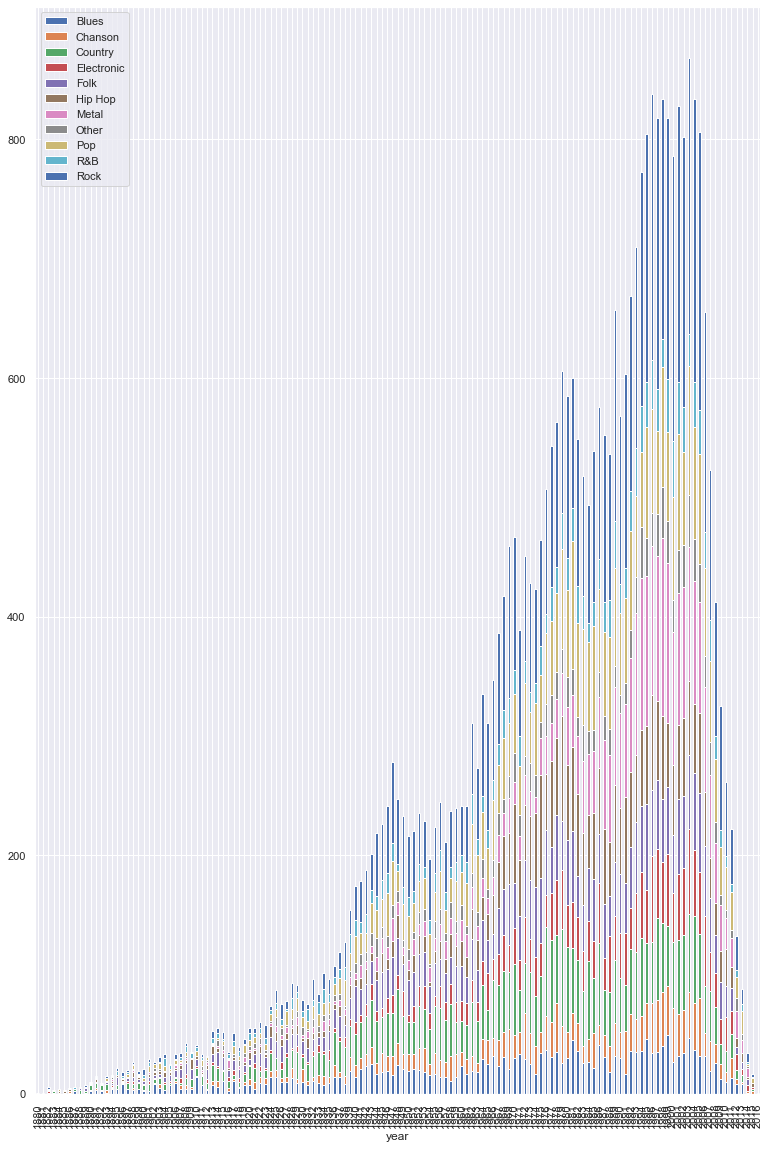

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (13, 20)
sns.set()
df_plot_1.set_index('year').plot(kind='bar', stacked=True)

In [135]:
df_plot = df_plot.rename(columns={'date': 'year'})

In [136]:
df_plot_1.to_csv('year_genre_stacked.csv', index = False)

In [1]:
import pandas as pd
data = pd.read_csv('year_genre_stacked.csv')

In [4]:
data = data.rename(columns={'Hip Hop': 'HipHop'})
data = data.rename(columns={'R&B': 'RnB'})

In [6]:
data.columns

Index(['year', 'Blues', 'Chanson', 'Country', 'Electronic', 'Folk', 'HipHop',
       'Metal', 'Other', 'Pop', 'RnB', 'Rock'],
      dtype='object')

In [7]:
frame = data[['year', 'Rock', 'Pop', 'Country', 'HipHop', 'Folk',  'RnB', 'Metal', 'Blues', 'Electronic', 'Chanson', 'Other']]

In [8]:
frame

,year,Rock,Pop,Country,HipHop,Folk,RnB,Metal,Blues,Electronic,Chanson,Other
0,1880,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1881,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1882,2.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1883,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1884,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
132,2012,28.0,18.0,8.0,8.0,6.0,6.0,22.0,8.0,13.0,4.0,11.0
133,2013,13.0,19.0,6.0,7.0,6.0,6.0,11.0,8.0,5.0,2.0,5.0
134,2014,7.0,2.0,0.0,2.0,5.0,2.0,8.0,1.0,5.0,1.0,1.0
135,2015,3.0,4.0,2.0,3.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0


In [9]:
frame.to_csv('year_genre_stacked.csv', index = False)

In [12]:
from datetime import datetime
date_stamp = datetime(2019, 1, 1)
date_stamp.strftime('%d/%m/%Y')

'01/01/2019'

In [54]:
for ind in df_plot.index:
    row = df_plot['date'][ind]
    date_stamp = datetime(row, 1, 1)
    df_plot['date'][ind] = date_stamp.strftime('%d/%m/%Y')

In [55]:
df_plot.head()

,dbp_genre,date,country
0,Rock,01/01/1995,England
1,Rock,01/01/2010,Italy
4,Metal,01/01/2001,United States
7,Chanson,01/01/2001,United States
10,Rock,01/01/2006,United States


In [57]:
[1]*len

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [59]:
len(df_plot)

35962

In [67]:
new_col = [1]*len(df_plot)
df_plot.insert(5, 'lang', new_col)

In [70]:
df_plot.head()

,count_l,count_c,dbp_genre,date,country,lang,count_x
0,1,1,Rock,01/01/1995,England,english,1
1,1,1,Rock,01/01/2010,Italy,english,1
4,1,1,Metal,01/01/2001,United States,english,1
7,1,1,Chanson,01/01/2001,United States,english,1
10,1,1,Rock,01/01/2006,United States,other,1


In [64]:
list_language = []

for i in range(100):
    if i < 76:
        list_language.append("english")
    elif i < 83:
        list_language.append("spanish")
    elif i < 87:
        list_language.append("german")
    elif i < 91:
        list_language.append("french")
    elif i < 94:
        list_language.append("italian")
    elif i < 96:
        list_language.append("portuguese")
    else:
        list_language.append("other")

In [69]:
for ind in df_plot.index:
    row = df_plot['lang'][ind]
    if row == 1:
        df_plot['lang'][ind] = random.choice(list_language)

<ipython-input-69-d35dd690ed5a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['lang'][ind] = random.choice(list_language)
C:\Users\frafa\anaconda3\envs\data_visual_p\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [74]:
counts_genre = df_plot['lang'].value_counts().to_dict()
print(counts_genre)

{'english': 27217, 'spanish': 2536, 'french': 1480, 'german': 1456, 'other': 1426, 'italian': 1081, 'portuguese': 766}


In [76]:
frame = df_plot[['count_c', 'count_l', 'lang', 'country', 'date', 'dbp_genre', 'count_x']]

In [78]:
frame.head()

,count_c,count_l,lang,country,date,dbp_genre,count_x
0,1,1,english,England,01/01/1995,Rock,1
1,1,1,english,Italy,01/01/2010,Rock,1
4,1,1,english,United States,01/01/2001,Metal,1
7,1,1,english,United States,01/01/2001,Chanson,1
10,1,1,other,United States,01/01/2006,Rock,1


In [79]:
frame.columns = ["call_duration", "call_revenue", "category", "company_size", "date", "team", "units_sold"]

In [87]:
frame

,call_duration,call_revenue,category,company_size,date,team,units_sold
0,1,1,english,England,01/01/1995,Rock,1
1,1,1,english,Italy,01/01/2010,Rock,1
4,1,1,english,United States,01/01/2001,Metal,1
7,1,1,english,United States,01/01/2001,Chanson,1
10,1,1,other,United States,01/01/2006,Rock,1
...,...,...,...,...,...,...,...
77481,1,1,english,France,01/01/1964,Electronic,1
77482,1,1,english,Australia,01/01/2010,Metal,1
77483,1,1,english,United States,01/01/1972,Folk,1
77486,1,1,english,France,01/01/2007,RnB,1


In [84]:
frame.sort_values(by=['date'], ascending=False)

,call_duration,call_revenue,category,company_size,date,team,units_sold
73959,1,1,spanish,Canada,01/01/2016,Rock,1
18963,1,1,italian,United States,01/01/2015,Electronic,1
23930,1,1,english,Germany,01/01/2015,Rock,1
65552,1,1,english,United States,01/01/2015,Rock,1
22243,1,1,spanish,United States,01/01/2015,HipHop,1
...,...,...,...,...,...,...,...
4836,1,1,english,Finland,01/01/1882,HipHop,1
13887,1,1,english,France,01/01/1882,Rock,1
26160,1,1,italian,Canada,01/01/1882,Country,1
8199,1,1,portuguese,United States,01/01/1881,Blues,1


In [88]:
frame.drop_duplicates()

,call_duration,call_revenue,category,company_size,date,team,units_sold
0,1,1,english,England,01/01/1995,Rock,1
1,1,1,english,Italy,01/01/2010,Rock,1
4,1,1,english,United States,01/01/2001,Metal,1
7,1,1,english,United States,01/01/2001,Chanson,1
10,1,1,other,United States,01/01/2006,Rock,1
...,...,...,...,...,...,...,...
77468,1,1,french,Sweden,01/01/1907,Country,1
77469,1,1,english,Germany,01/01/1951,Folk,1
77471,1,1,italian,England,01/01/1974,Pop,1
77477,1,1,french,Sweden,01/01/1951,Metal,1


In [ ]:
frame['Counts'] = frame.groupby(['company_size'])['Value'].transform('count')

In [101]:
new_data = frame.value_counts()

In [102]:
new_data = frame.value_counts().reset_index(name='counts')

In [103]:
new_data

,call_duration,call_revenue,category,company_size,date,team,units_sold,counts
0,1,1,english,United States,01/01/2004,Rock,1,97
1,1,1,english,United States,01/01/2001,Rock,1,96
2,1,1,english,United States,01/01/2000,Rock,1,95
3,1,1,english,United States,01/01/2005,Rock,1,94
4,1,1,english,United States,01/01/2003,Rock,1,81
...,...,...,...,...,...,...,...,...
14656,1,1,german,United States,01/01/1930,Chanson,1,1
14657,1,1,german,United States,01/01/1930,Blues,1,1
14658,1,1,german,United States,01/01/1928,Pop,1,1
14659,1,1,german,United States,01/01/1925,Pop,1,1


In [104]:
new_data['call_revenue'] = new_data['counts']
new_data

,call_duration,call_revenue,category,company_size,date,team,units_sold,counts
0,1,97,english,United States,01/01/2004,Rock,1,97
1,1,96,english,United States,01/01/2001,Rock,1,96
2,1,95,english,United States,01/01/2000,Rock,1,95
3,1,94,english,United States,01/01/2005,Rock,1,94
4,1,81,english,United States,01/01/2003,Rock,1,81
...,...,...,...,...,...,...,...,...
14656,1,1,german,United States,01/01/1930,Chanson,1,1
14657,1,1,german,United States,01/01/1930,Blues,1,1
14658,1,1,german,United States,01/01/1928,Pop,1,1
14659,1,1,german,United States,01/01/1925,Pop,1,1


In [107]:
new_data = new_data.drop(columns = ["counts"])

In [108]:
new_data

,call_duration,call_revenue,category,company_size,date,team,units_sold
0,1,97,english,United States,01/01/2004,Rock,1
1,1,96,english,United States,01/01/2001,Rock,1
2,1,95,english,United States,01/01/2000,Rock,1
3,1,94,english,United States,01/01/2005,Rock,1
4,1,81,english,United States,01/01/2003,Rock,1
...,...,...,...,...,...,...,...
14656,1,1,german,United States,01/01/1930,Chanson,1
14657,1,1,german,United States,01/01/1930,Blues,1
14658,1,1,german,United States,01/01/1928,Pop,1
14659,1,1,german,United States,01/01/1925,Pop,1


In [123]:
new_data = new_data.sort_values(by=['date'], ascending=False)
new_data.reset_index(inplace = True, drop = True)
new_data

,call_duration,call_revenue,category,company_size,date,team,units_sold
0,1,1,spanish,Canada,01/01/2016,Rock,1
1,1,1,other,England,01/01/2015,Pop,1
2,1,1,spanish,England,01/01/2015,Rock,1
3,1,1,english,United States,01/01/2015,RnB,1
4,1,1,italian,United States,01/01/2015,HipHop,1
...,...,...,...,...,...,...,...
14656,1,1,english,Canada,01/01/1882,Country,1
14657,1,1,italian,Canada,01/01/1882,Country,1
14658,1,1,english,France,01/01/1882,Rock,1
14659,1,1,portuguese,United States,01/01/1881,Blues,1


In [119]:
row = new_data['date'][0]
print(row)
if row == '01/01/2004':
    print(new_data.loc[[ind]])

01/01/2004
   call_duration  call_revenue category   company_size        date  team  \
2              1            95  english  United States  01/01/2000  Rock   

   units_sold  
2           1  


In [122]:
sum = 0
for ind in new_data.index:
    row = new_data['date'][ind]
    if row == '01/01/2004':
        sum+=1 
        print(new_data.loc[[ind]])
print(sum)

   call_duration  call_revenue category   company_size        date  team  \
0              1            97  english  United States  01/01/2004  Rock   

   units_sold  
0           1  
    call_duration  call_revenue category company_size        date  team  \
45              1            28  english      England  01/01/2004  Rock   

    units_sold  
45           1  
    call_duration  call_revenue category   company_size        date   team  \
53              1            27  english  United States  01/01/2004  Metal   

    units_sold  
53           1  
    call_duration  call_revenue category   company_size        date    team  \
85              1            23  english  United States  01/01/2004  HipHop   

    units_sold  
85           1  
     call_duration  call_revenue category   company_size        date team  \
162              1            18  english  United States  01/01/2004  Pop   

     units_sold  
162           1  
     call_duration  call_revenue category company_size 

4600  Electronic           1  
      call_duration  call_revenue category    company_size        date team  \
4613              1             2  english  United Kingdom  01/01/2004  RnB   

      units_sold  
4613           1  
      call_duration  call_revenue    category   company_size        date team  \
4706              1             2  portuguese  United States  01/01/2004  Pop   

      units_sold  
4706           1  
      call_duration  call_revenue category company_size        date team  \
4725              1             2    other      England  01/01/2004  Pop   

      units_sold  
4725           1  
      call_duration  call_revenue category company_size        date   team  \
4812              1             2  spanish       Canada  01/01/2004  Metal   

      units_sold  
4812           1  
      call_duration  call_revenue category company_size        date  team  \
4815              1             2  spanish       Canada  01/01/2004  Rock   

      units_sold  
4815       

11115           1  
       call_duration  call_revenue category company_size        date team  \
11137              1             1  spanish    Australia  01/01/2004  RnB   

       units_sold  
11137           1  
       call_duration  call_revenue category company_size        date team  \
11196              1             1  spanish       France  01/01/2004  RnB   

       units_sold  
11196           1  
       call_duration  call_revenue category company_size        date  \
11197              1             1  spanish       France  01/01/2004   

             team  units_sold  
11197  Electronic           1  
       call_duration  call_revenue category company_size        date  team  \
11461              1             1  spanish      England  01/01/2004  Rock   

       units_sold  
11461           1  
       call_duration  call_revenue category company_size        date team  \
11552              1             1  spanish      Finland  01/01/2004  Pop   

       units_sold  
11552    

In [124]:
new_data.to_json(r'info_viz_project_filter_order_final.json', orient="records")